<a href="https://colab.research.google.com/github/SyaidFarhan/Project_Kuliah_Syaid/blob/main/ML_replikasi_artikel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 6:
*   Tengku Syaid Farhan	(22/493899/PA/21181)
*   Rahmad Ramadhan	(22/494516/PA/21278)
*   Intan Dwi Febryanti	(22/494760/PA/21285)

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_error

# Dataset
## Data Collection

In [ ]:
# Load the dataset into a DataFrame
df = pd.read_csv('/content/02 total-cancer-deaths-by-type (1) (1).csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
df.head()

Dataset Preview:


,Entity,Code,Year,Deaths - Liver cancer - Sex: Both - Age: All Ages (Number),Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number),Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number),Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number),...,Deaths - Brain and central nervous system cancer - Sex: Both - Age: All Ages (Number),Deaths - Non-Hodgkin lymphoma - Sex: Both - Age: All Ages (Number),Deaths - Pancreatic cancer - Sex: Both - Age: All Ages (Number),Deaths - Esophageal cancer - Sex: Both - Age: All Ages (Number),Deaths - Testicular cancer - Sex: Both - Age: All Ages (Number),Deaths - Nasopharynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Other pharynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Colon and rectum cancer - Sex: Both - Age: All Ages (Number),Deaths - Non-melanoma skin cancer - Sex: Both - Age: All Ages (Number),Deaths - Mesothelioma - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,851,66,89,983,260,180,47,...,422,996,138,529,3,66,37,539,25,6
1,Afghanistan,AFG,1991,866,66,89,982,263,182,48,...,438,1010,137,535,4,67,37,542,26,7
2,Afghanistan,AFG,1992,890,68,91,989,268,185,51,...,472,1040,137,546,4,69,38,550,26,7
3,Afghanistan,AFG,1993,914,70,93,995,275,189,53,...,505,1062,139,560,5,72,39,555,27,7
4,Afghanistan,AFG,1994,933,71,94,996,282,193,54,...,526,1069,140,575,5,73,39,554,28,8


# Eksplorasi Data

In [ ]:
df.info()  # Melihat tipe data dan missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 32 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   Entity                                                                                 6840 non-null   object
 1   Code                                                                                   6150 non-null   object
 2   Year                                                                                   6840 non-null   int64 
 3   Deaths - Liver cancer - Sex: Both - Age: All Ages (Number)                             6840 non-null   int64 
 4   Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number)                            6840 non-null   int64 
 5   Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number)           

In [ ]:
df.describe()  # Statistik dasar

,Year,Deaths - Liver cancer - Sex: Both - Age: All Ages (Number),Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number),Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number),Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number),Deaths - Leukemia - Sex: Both - Age: All Ages (Number),Deaths - Hodgkin lymphoma - Sex: Both - Age: All Ages (Number),...,Deaths - Brain and central nervous system cancer - Sex: Both - Age: All Ages (Number),Deaths - Non-Hodgkin lymphoma - Sex: Both - Age: All Ages (Number),Deaths - Pancreatic cancer - Sex: Both - Age: All Ages (Number),Deaths - Esophageal cancer - Sex: Both - Age: All Ages (Number),Deaths - Testicular cancer - Sex: Both - Age: All Ages (Number),Deaths - Nasopharynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Other pharynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Colon and rectum cancer - Sex: Both - Age: All Ages (Number),Deaths - Non-melanoma skin cancer - Sex: Both - Age: All Ages (Number),Deaths - Mesothelioma - Sex: Both - Age: All Ages (Number)
count,6840.000000,6840.000000,6840.000000,6840.000000,6.840000e+03,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,...,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6.840000e+03,6840.000000,6840.000000
mean,2004.500000,11101.271784,3199.429386,3675.575292,4.104193e+04,2657.449269,3501.206287,1342.798099,7751.860673,687.833918,...,5051.367836,5035.701462,9316.956725,11125.409357,227.945322,1543.624415,2053.792544,2.098752e+04,999.656287,627.323392
std,8.656074,49811.256301,12976.577479,14825.601622,1.691944e+05,10193.582526,13828.506425,5467.369771,29052.110840,2527.658643,...,19680.003155,19417.171248,38332.881918,50361.727267,855.091329,6750.299254,9010.245495,8.425638e+04,4078.162712,2571.591522
min,1990.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1997.000000,39.000000,14.000000,17.000000,1.427500e+02,14.000000,12.000000,5.000000,49.000000,4.000000,...,23.000000,33.000000,40.000000,31.000000,1.000000,5.000000,6.000000,9.875000e+01,4.000000,2.000000
50%,2004.500000,222.000000,86.000000,89.000000,8.630000e+02,80.000000,79.000000,38.500000,299.000000,31.000000,...,170.500000,174.000000,231.000000,222.000000,8.000000,21.000000,33.000000,5.560000e+02,30.000000,10.000000
75%,2012.000000,985.000000,517.000000,463.000000,5.440750e+03,435.000000,491.000000,230.000000,1366.250000,130.000000,...,835.000000,852.750000,1418.000000,962.250000,41.000000,154.250000,192.000000,3.278250e+03,165.250000,72.000000
max,2019.000000,484577.000000,166438.000000,199398.000000,2.042640e+06,123356.000000,172441.000000,62844.000000,334592.000000,27839.000000,...,246253.000000,254614.000000,531107.000000,498067.000000,10842.000000,71610.000000,114207.000000,1.085798e+06,56054.000000,29251.000000


In [ ]:
df.isnull().sum()

,0
Entity,0
Code,690
Year,0
Deaths - Liver cancer - Sex: Both - Age: All Ages (Number),0
Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number),0
Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number),0
"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",0
Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number),0
Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number),0
Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number),0


# Jumlah Kematian kanker tertinggi

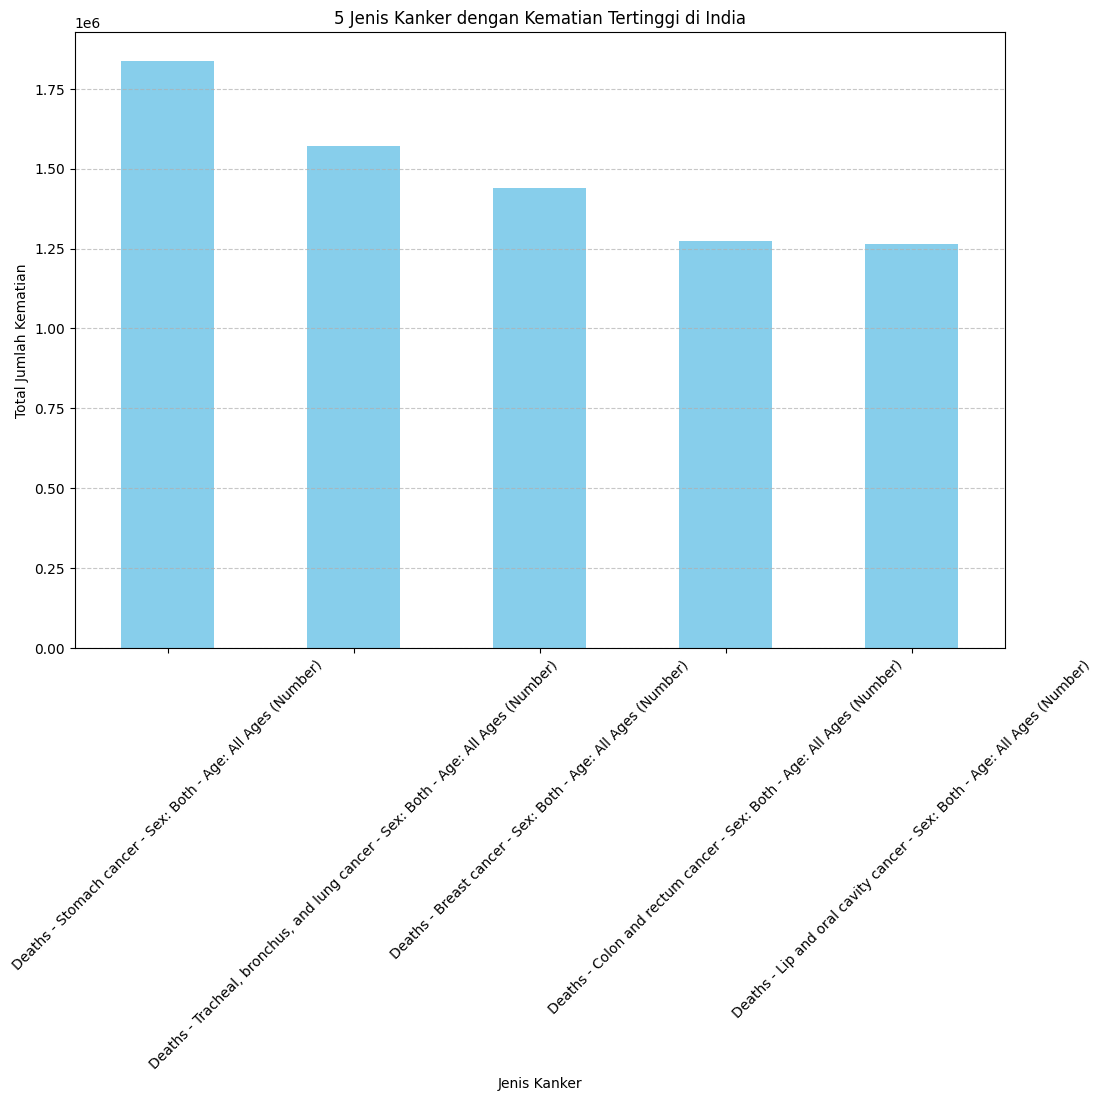

In [ ]:
import matplotlib.pyplot as plt

# Filter kolom yang mengandung "Deaths" dan "Sex: Both"
cancer_types = [col for col in df.columns if "Deaths" in col and "Sex: Both" in col]

# Filter data untuk India
df_india_cancer = df[df["Entity"] == "India"][["Year"] + cancer_types]

# Hitung total kematian untuk setiap jenis kanker
total_deaths = df_india_cancer[cancer_types].sum()

# Perpendek nama penyakit dengan menghapus "Deaths (Sex: Both)"
short_names = [col.replace("Deaths (Sex: Both)", "").strip() for col in total_deaths.index]

# Ambil 5 jenis kanker dengan jumlah kematian tertinggi
top_5_deaths = total_deaths.nlargest(5)

# Membuat diagram batang
plt.figure(figsize=(12, 8))
top_5_deaths.plot(kind='bar', color='skyblue')
plt.title("5 Jenis Kanker dengan Kematian Tertinggi di India")
plt.xlabel("Jenis Kanker")
plt.ylabel("Total Jumlah Kematian")
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Visualisasi Data Fitur Kanker yang digunakan

In [ ]:
lung_cancer_col = 'Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)'
# Filter data
df_india = df[df['Entity'] == 'India'][['Year', lung_cancer_col]]
df_india = df_india.rename(columns={lung_cancer_col: 'Lung Cancer Deaths'})

In [ ]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 2640 to 2669
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                30 non-null     int64
 1   Lung Cancer Deaths  30 non-null     int64
dtypes: int64(2)
memory usage: 720.0 bytes


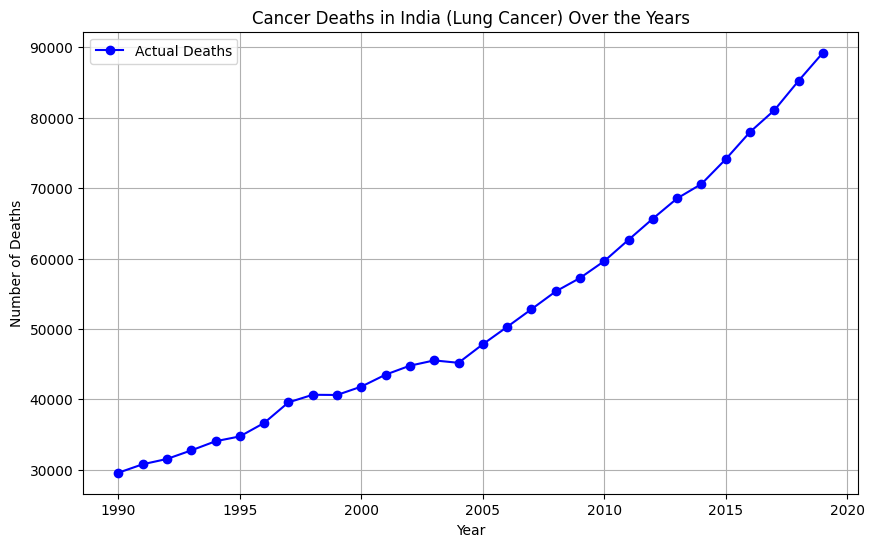

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_india['Year'], df_india['Lung Cancer Deaths'], marker='o', color='blue', label='Actual Deaths')
plt.title('Cancer Deaths in India (Lung Cancer) Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.legend()
plt.show()

# Distribusi Data

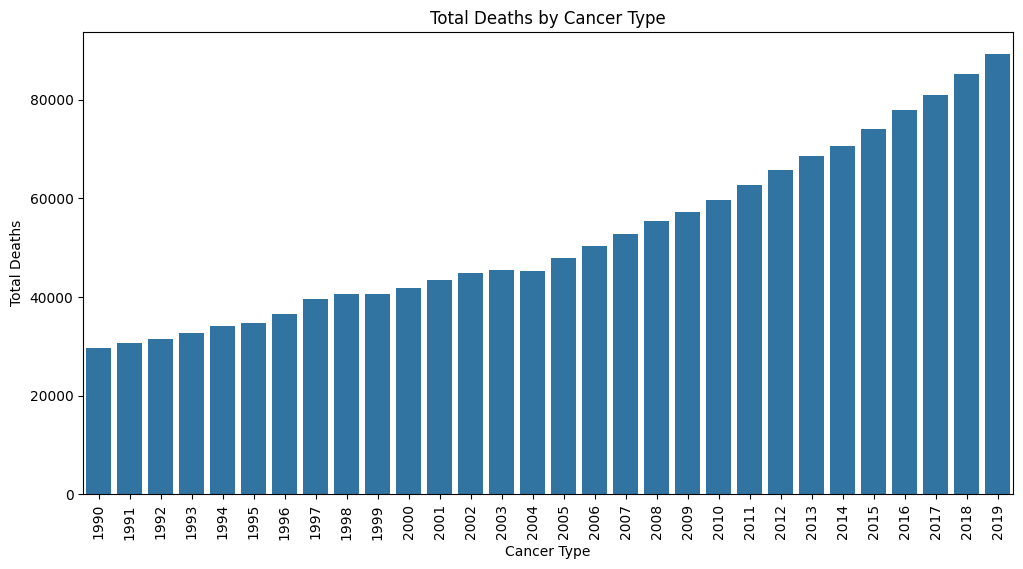

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=df_india['Year'], y= df_india['Lung Cancer Deaths'])
plt.xticks(rotation=90)
plt.xlabel('Cancer Type')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Cancer Type')
plt.show()

# Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# Load the dataset into a DataFrame
df = pd.read_csv('/content/02 total-cancer-deaths-by-type (1) (1).csv')

# Data Cleaning
df_india = df.drop_duplicates().dropna()

# Select India (Lung Cancer Deaths) and rename the column
lung_cancer_col = 'Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)'
df_india = df_india[df_india['Entity'] == 'India'][['Year', lung_cancer_col]]
df_india = df_india.rename(columns={lung_cancer_col: 'Lung Cancer Deaths'})


In [ ]:
# # Apply Exponential Smoothing for Noise Reduction
# df_india['Smoothed_Deaths'] = SimpleExpSmoothing(df_india['Lung Cancer Deaths']).fit(smoothing_level=0.2).fittedvalues

# # Normalize Year
# df_india['Year_norm'] = (df_india['Year'] - df_india['Year'].min()) / (df_india['Year'].max() - df_india['Year'].min())
# df_india.info()


# Modelling

In [ ]:
# Select feature and target
X = df_india[['Year']]
y = df_india['Lung Cancer Deaths']

# Split Data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Sebelum Scaling
print("\nData Sebelum Scaling:")
print(X_train.head())

# Data Scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setelah Scaling (ubah ke DataFrame untuk tampilan lebih jelas)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['Year_norm_Scaled'], index=X_train.index)

print("\nData Setelah Scaling:")
print(X_train_scaled_df.head())



Data Sebelum Scaling:
      Year
2668  2018
2664  2014
2652  2002
2640  1990
2644  1994

Data Setelah Scaling:
      Year_norm_Scaled
2668          0.935484
2664          0.677419
2652         -0.096774
2640         -0.870968
2644         -0.612903


## Linear Regression

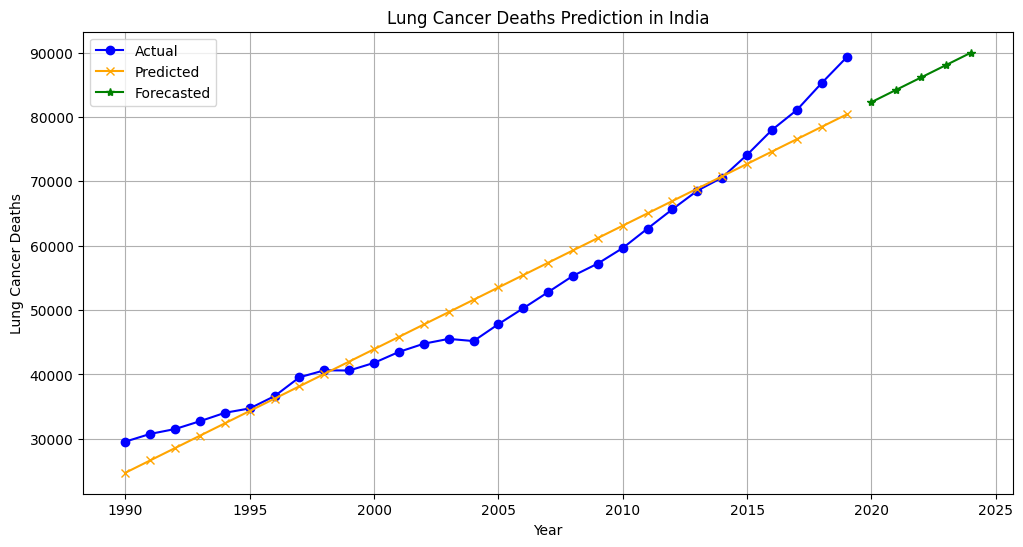

In [ ]:
# Split data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi pada data test untuk evaluasi
y_test_pred = model.predict(X_test)

# Prediksi pada seluruh dataset untuk visualisasi garis prediksi
y_all_pred = model.predict(X)

# Forecasting jumlah kematian 5 tahun ke depan
future_years = pd.DataFrame({'Year': np.arange(df_india['Year'].max() + 1, df_india['Year'].max() + 6)})
forecast = model.predict(future_years)

# Plot data aktual, prediksi, dan hasil forecasting
plt.figure(figsize=(12,6))
plt.plot(df_india['Year'], y, marker='o', label='Actual', color='blue')
plt.plot(df_india['Year'], y_all_pred, marker='x', label='Predicted', color='orange')
plt.plot(future_years['Year'], forecast, marker='*', label='Forecasted', color='green')
plt.xlabel('Year')
plt.ylabel('Lung Cancer Deaths')
plt.title('Lung Cancer Deaths Prediction in India')
plt.legend()
plt.grid(True)
plt.show()


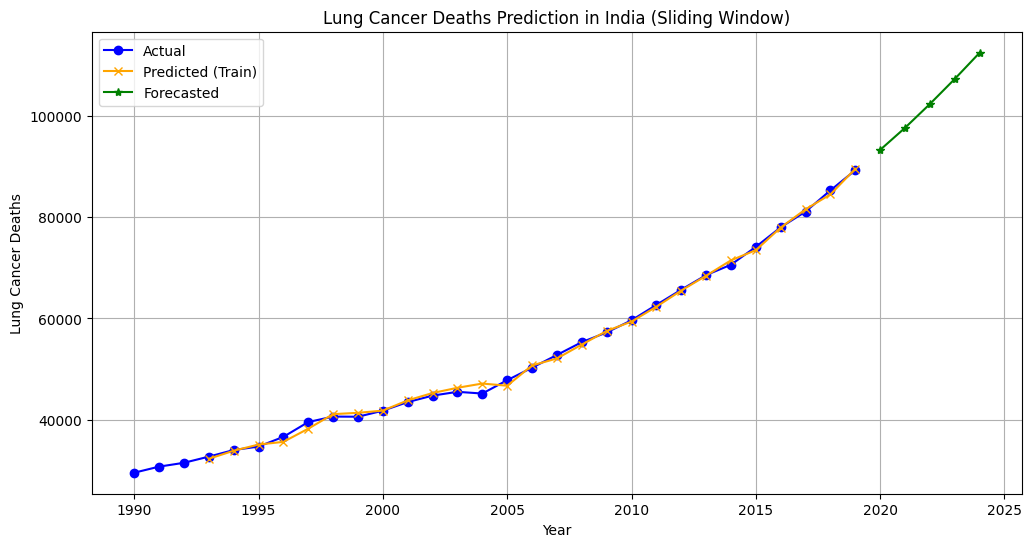

In [ ]:
#Membuat fungsi untuk sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Parameter sliding window
window_size = 3  # Kamu bisa ganti sesuai kebutuhan

# Buat data input (features) dan target (label) dengan sliding window
deaths = df_india['Lung Cancer Deaths'].values
X, y = create_sliding_window(deaths, window_size)

# Split data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi pada data test untuk evaluasi
y_test_pred = model.predict(X_test)

# Prediksi pada seluruh dataset (untuk plotting prediksi)
y_all_pred = model.predict(X)

# Forecasting jumlah kematian 5 tahun ke depan
future_preds = []
last_window = deaths[-window_size:].tolist()

for _ in range(5):
    pred = model.predict([last_window])
    future_preds.append(pred[0])
    last_window.pop(0)
    last_window.append(pred[0])

# Plot data aktual, prediksi, dan hasil forecasting
plt.figure(figsize=(12,6))
plt.plot(df_india['Year'], deaths, marker='o', label='Actual', color='blue')

# Karena y_all_pred lebih pendek karena sliding window
plt.plot(df_india['Year'][window_size:], y_all_pred, marker='x', label='Predicted (Train)', color='orange')

# Plot forecast future
future_years = np.arange(df_india['Year'].max() + 1, df_india['Year'].max() + 1 + 5)
plt.plot(future_years, future_preds, marker='*', label='Forecasted', color='green')

plt.xlabel('Year')
plt.ylabel('Lung Cancer Deaths')
plt.title('Lung Cancer Deaths Prediction in India (Sliding Window)')
plt.legend()
plt.grid(True)
plt.show()

## Polynomial Regression

Mean Squared Error (Test): 2100322.8733917414
R2 Score (Test): 0.9905412509229377


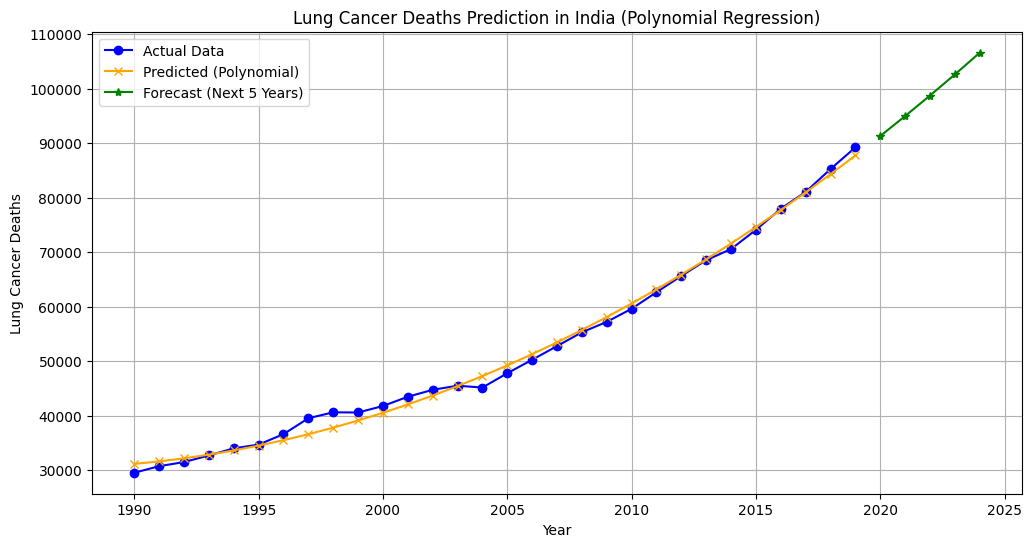

In [ ]:
X = df_india[['Year']]  # Pastikan X dalam bentuk 2D
y = df_india['Lung Cancer Deaths']

# Ubah fitur menjadi polynomial (contoh degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi polynomial
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

# Prediksi pada data test untuk evaluasi
y_test_pred_poly = model_poly.predict(X_test)

# Evaluasi performa model
print("Mean Squared Error (Test):", mean_squared_error(y_test, y_test_pred_poly))
print("R2 Score (Test):", r2_score(y_test, y_test_pred_poly))

# Prediksi pada seluruh dataset untuk visualisasi
y_all_pred_poly = model_poly.predict(X_poly)

# Forecasting jumlah kematian 5 tahun ke depan
future_years = pd.DataFrame({'Year': np.arange(df_india['Year'].max() + 1, df_india['Year'].max() + 6)})
future_years_poly = poly.transform(future_years)
forecast_poly = model_poly.predict(future_years_poly)

# Plot data aktual, prediksi, dan hasil forecasting Polynomial Regression
plt.figure(figsize=(12,6))
plt.plot(df_india['Year'], y, marker='o', label='Actual Data', color='blue')
plt.plot(df_india['Year'], y_all_pred_poly, marker='x', label='Predicted (Polynomial)', color='orange')
plt.plot(future_years['Year'], forecast_poly, marker='*', label='Forecast (Next 5 Years)', color='green')
plt.xlabel('Year')
plt.ylabel('Lung Cancer Deaths')
plt.title('Lung Cancer Deaths Prediction in India (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

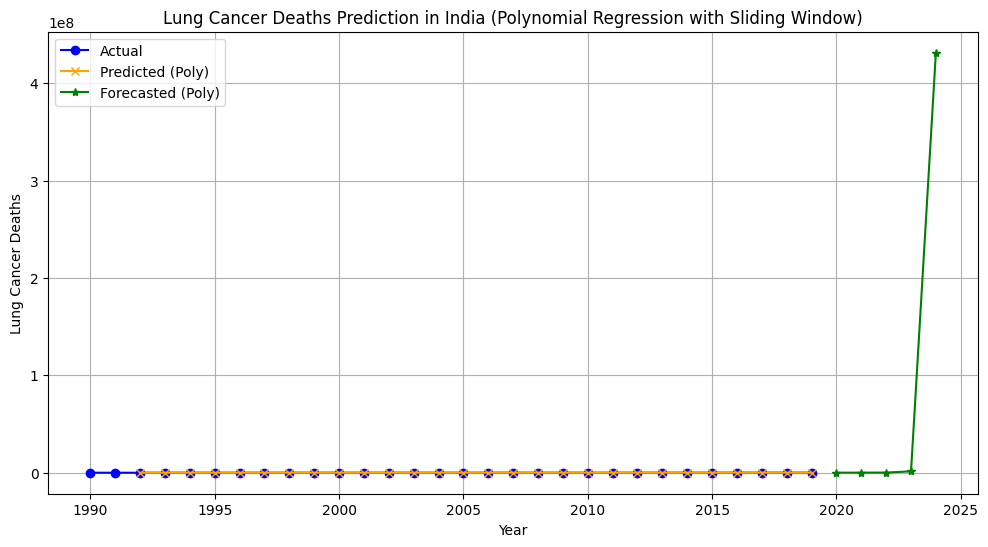

In [ ]:
# Fungsi untuk sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Parameter sliding window
window_size = 2  # Bisa disesuaikan

# Buat data input (features) dan target (label) dengan sliding window
deaths = df_india['Lung Cancer Deaths'].values
X, y = create_sliding_window(deaths, window_size)

# Transformasi fitur ke polynomial
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42, shuffle=False)

# Membuat dan melatih model regresi polynomial
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

# Prediksi pada data test untuk evaluasi
y_test_pred_poly = model_poly.predict(X_test)

# Prediksi pada seluruh dataset (untuk plotting prediksi)
y_all_pred_poly = model_poly.predict(X_poly)

# Forecasting jumlah kematian 5 tahun ke depan
future_preds_poly = []
last_window = deaths[-window_size:].tolist()

for _ in range(5):
    last_window_poly = poly.transform([last_window])
    pred = model_poly.predict(last_window_poly)
    future_preds_poly.append(pred[0])
    last_window.pop(0)
    last_window.append(pred[0])

# Plot data aktual, prediksi, dan hasil forecasting Polynomial Regression
plt.figure(figsize=(12,6))
plt.plot(df_india['Year'], deaths, marker='o', label='Actual', color='blue')
plt.plot(df_india['Year'][window_size:], y_all_pred_poly, marker='x', label='Predicted (Poly)', color='orange')

# Plot forecast future
future_years = np.arange(df_india['Year'].max() + 1, df_india['Year'].max() + 1 + 5)
plt.plot(future_years, future_preds_poly, marker='*', label='Forecasted (Poly)', color='green')

plt.xlabel('Year')
plt.ylabel('Lung Cancer Deaths')
plt.title('Lung Cancer Deaths Prediction in India (Polynomial Regression with Sliding Window)')
plt.legend()
plt.grid(True)
plt.show()

## Decision Tree Regression

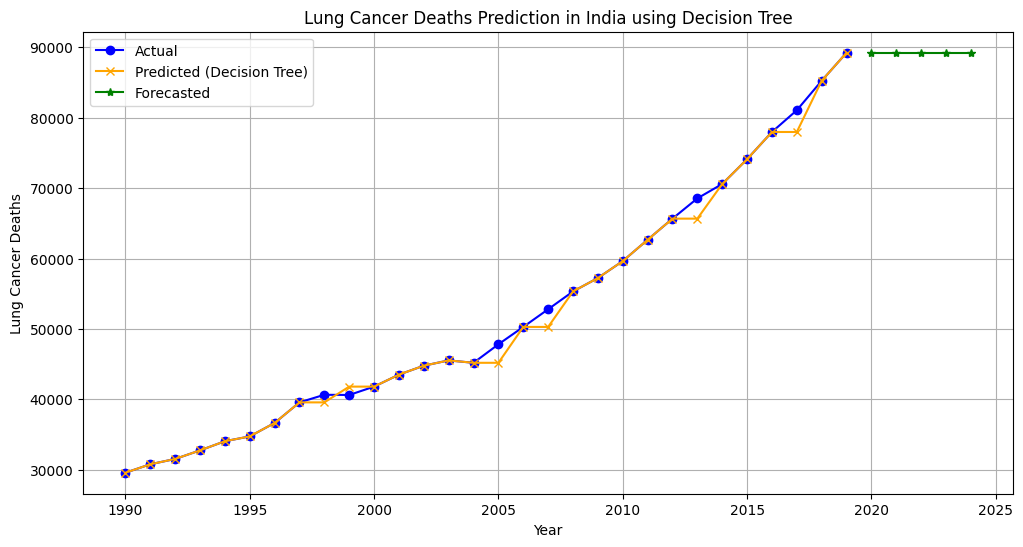

In [ ]:
X = df_india[['Year']]  # Pastikan X dalam bentuk 2D
y = df_india['Lung Cancer Deaths']

# Ubah fitur menjadi polynomial (contoh degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data test untuk evaluasi
y_test_pred = model.predict(X_test)

# Prediksi pada seluruh dataset untuk visualisasi garis prediksi
y_all_pred = model.predict(X)

# Forecasting jumlah kematian 5 tahun ke depan
future_years = pd.DataFrame({'Year': np.arange(df_india['Year'].max() + 1, df_india['Year'].max() + 6)})
forecast = model.predict(future_years)

# Plot data aktual, prediksi, dan hasil forecasting
plt.figure(figsize=(12,6))
plt.plot(df_india['Year'], y, marker='o', label='Actual', color='blue')
plt.plot(df_india['Year'], y_all_pred, marker='x', label='Predicted (Decision Tree)', color='orange')
plt.plot(future_years['Year'], forecast, marker='*', label='Forecasted', color='green')
plt.xlabel('Year')
plt.ylabel('Lung Cancer Deaths')
plt.title('Lung Cancer Deaths Prediction in India using Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


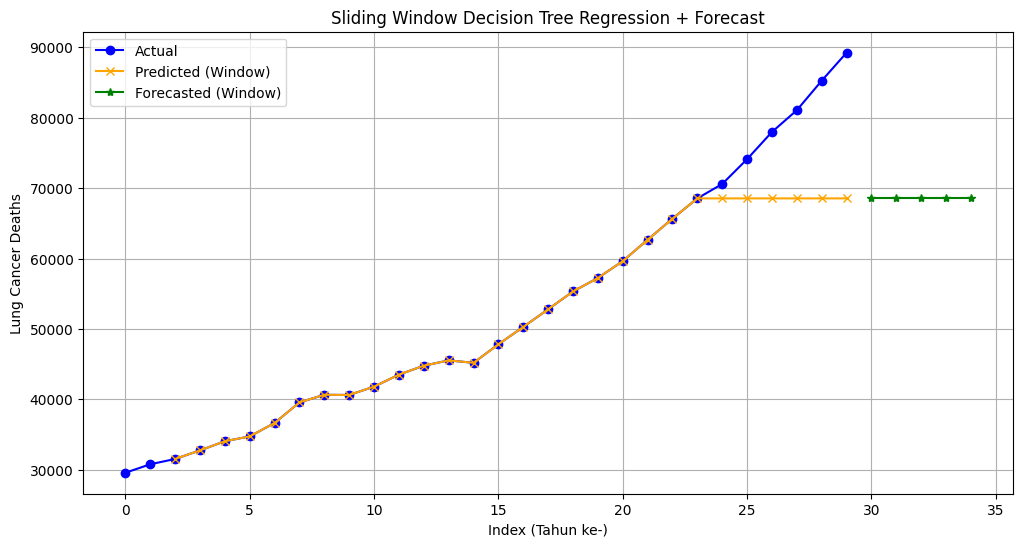

R2 Score (Test - Sliding - Decision Tree): -3.1033215736972624
MSE (Test - Sliding - Decision Tree): 164786828.0


In [ ]:

X = df_india[['Year']]  # Pastikan X dalam bentuk 2D
y = df_india['Lung Cancer Deaths']

# Decision Tree with Sliding Window
window_size = 2  # Ukuran sliding window

# Fungsi untuk membuat dataset sliding window
def create_window_data(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i + window])
        y.append(data[i + window])
    return np.array(X), np.array(y)

# Membuat dataset sliding window
X_window, y_window = create_window_data(df_india['Lung Cancer Deaths'].values, window_size)

# Split data menjadi 80% train dan 20% test
split_idx = int(len(X_window) * 0.8)
X_train_w, X_test_w = X_window[:split_idx], X_window[split_idx:]
y_train_w, y_test_w = y_window[:split_idx], y_window[split_idx:]

# Membuat dan melatih model Decision Tree Regressor
model_dt_w = DecisionTreeRegressor(random_state=42)
model_dt_w.fit(X_train_w, y_train_w)

# Prediksi pada data test
y_test_pred_dt_w = model_dt_w.predict(X_test_w)

# Prediksi pada seluruh dataset untuk visualisasi
y_all_pred_dt_w = model_dt_w.predict(X_window)

# Forecasting 5 tahun ke depan
forecast_input = list(df_india['Lung Cancer Deaths'].values[-window_size:])
forecast_result_dt_w = []
for i in range(5):
    input_arr = np.array(forecast_input[-window_size:]).reshape(1, -1)
    next_pred = model_dt_w.predict(input_arr)[0]
    forecast_result_dt_w.append(next_pred)
    forecast_input.append(next_pred)


# Plot hasil aktual, prediksi, dan forecasting
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(df_india['Lung Cancer Deaths'])), df_india['Lung Cancer Deaths'].values, marker='o', label='Actual', color='blue')
plt.plot(np.arange(window_size, window_size + len(y_all_pred_dt_w)), y_all_pred_dt_w,
         marker='x', label='Predicted (Window)', color='orange')
plt.plot(np.arange(len(df_india['Lung Cancer Deaths']), len(df_india['Lung Cancer Deaths']) + 5), forecast_result_dt_w,
         marker='*', label='Forecasted (Window)', color='green')
plt.xlabel('Index (Tahun ke-)')
plt.ylabel('Lung Cancer Deaths')
plt.title('Sliding Window Decision Tree Regression + Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation (optional)
print("R2 Score (Test - Sliding - Decision Tree):", r2_score(y_test_w, y_test_pred_dt_w))
print("MSE (Test - Sliding - Decision Tree):", mean_squared_error(y_test_w, y_test_pred_dt_w))


# Random Forest Regression

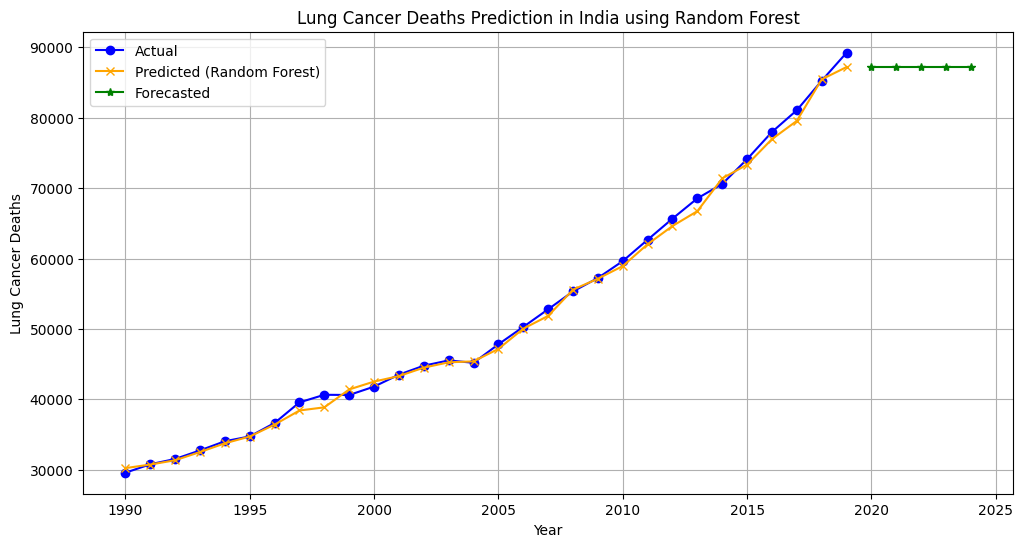

Model Evaluation Metrics (Random Forest Regression):
Mean Absolute Error (MAE): 1249.65
Mean Squared Error (MSE): 1784174.53
Root Mean Squared Error (RMSE): 1335.73
R² Score: 0.9920
Explained Variance Score (EVS): 0.9964


In [ ]:
X = df_india[['Year']]  # Pastikan X dalam bentuk 2D
y = df_india['Lung Cancer Deaths']

# Ubah fitur menjadi polynomial (contoh degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
# Split data menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Anda bisa sesuaikan n_estimators
model.fit(X_train, y_train)

# Prediksi pada data test untuk evaluasi
y_test_pred = model.predict(X_test)

# Prediksi pada seluruh dataset untuk visualisasi garis prediksi
y_all_pred = model.predict(X)

# Forecasting jumlah kematian 5 tahun ke depan
future_years = pd.DataFrame({'Year': np.arange(df_india['Year'].max() + 1, df_india['Year'].max() + 6)})
forecast = model.predict(future_years)

# Plot data aktual, prediksi, dan hasil forecasting
plt.figure(figsize=(12,6))
plt.plot(df_india['Year'], y, marker='o', label='Actual', color='blue')
plt.plot(df_india['Year'], y_all_pred, marker='x', label='Predicted (Random Forest)', color='orange')
plt.plot(future_years['Year'], forecast, marker='*', label='Forecasted', color='green')
plt.xlabel('Year')
plt.ylabel('Lung Cancer Deaths')
plt.title('Lung Cancer Deaths Prediction in India using Random Forest')
plt.legend()
plt.grid(True)
plt.show()

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
evs = explained_variance_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Model Evaluation Metrics (Random Forest Regression):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Explained Variance Score (EVS): {evs:.4f}")

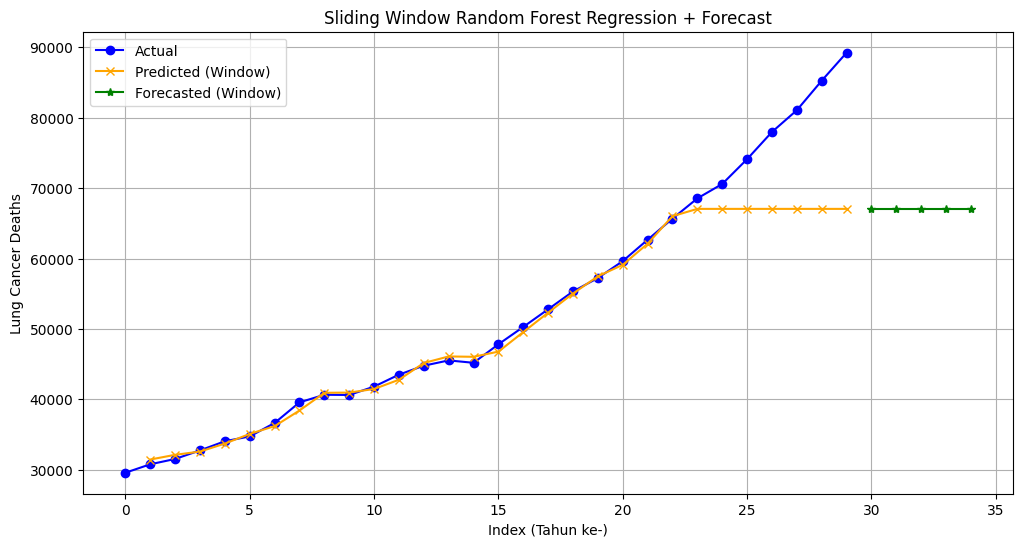

R2 Score (Test - Sliding - Random Forest): -3.988206381450091
MSE (Test - Sliding - Random Forest): 200323248.4330666


In [ ]:
X = df_india[['Year']]  # Pastikan X dalam bentuk 2D
y = df_india['Lung Cancer Deaths']

# Ubah fitur menjadi polynomial (contoh degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
# Random Forest with Sliding Window
window_size = 1  # Ukuran sliding window

# Fungsi untuk membuat dataset sliding window
def create_window_data(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i + window])
        y.append(data[i + window])
    return np.array(X), np.array(y)

# Membuat dataset sliding window
X_window, y_window = create_window_data(df_india['Lung Cancer Deaths'].values, window_size)

# Split data menjadi 80% train dan 20% test
split_idx = int(len(X_window) * 0.8)
X_train_w, X_test_w = X_window[:split_idx], X_window[split_idx:]
y_train_w, y_test_w = y_window[:split_idx], y_window[split_idx:]

# Membuat dan melatih model Random Forest Regressor
model_rf_w = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_w.fit(X_train_w, y_train_w)

# Prediksi pada data test
y_test_pred_rf_w = model_rf_w.predict(X_test_w)

# Prediksi pada seluruh dataset untuk visualisasi
y_all_pred_rf_w = model_rf_w.predict(X_window)

# Forecasting 5 tahun ke depan
forecast_input = list(df_india['Lung Cancer Deaths'].values[-window_size:])
forecast_result_rf_w = []
for i in range(5):
    input_arr = np.array(forecast_input[-window_size:]).reshape(1, -1)
    next_pred = model_rf_w.predict(input_arr)[0]
    forecast_result_rf_w.append(next_pred)
    forecast_input.append(next_pred)

# Plot hasil aktual, prediksi, dan forecasting
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(df_india['Lung Cancer Deaths'])), df_india['Lung Cancer Deaths'].values, marker='o', label='Actual', color='blue')
plt.plot(np.arange(window_size, window_size + len(y_all_pred_rf_w)), y_all_pred_rf_w,
         marker='x', label='Predicted (Window)', color='orange')
plt.plot(np.arange(len(df_india['Lung Cancer Deaths']), len(df_india['Lung Cancer Deaths']) + 5), forecast_result_rf_w,
         marker='*', label='Forecasted (Window)', color='green')
plt.xlabel('Index (Tahun ke-)')
plt.ylabel('Lung Cancer Deaths')
plt.title('Sliding Window Random Forest Regression + Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation (optional)
print("R2 Score (Test - Sliding - Random Forest):", r2_score(y_test_w, y_test_pred_rf_w))
print("MSE (Test - Sliding - Random Forest):", mean_squared_error(y_test_w, y_test_pred_rf_w))


## Hasil dan Pembahasan

###Perbedaan


*   Parameter: Paper tidak menyebutkan parameter yang digunakan dalam model yang digunakan
*   Feature Extraction: Paper tidak menyebutkan secara eksplisit fitur mana saja yang digunakan
*   Metode Preprocessing: Paper tidak menyebutkan secara eksplisit metode apa yang digunakan untuk menghandle missing values dan outlier



###Kendala
*   Paper tidak menyebutkan secara eksplisit fitur mana saja yang digunakan dari dataset
*   Paper tidak menyebutkan secara spesifik parameter apa saja yang digunakan dalam model (jumlah pohon dalam Random Forest, kedalaman maksimum Decision Tree)
*   Paper tidak menyebutkan secara eksplisit metode prediksi apa yang digunakan

###Kesimpulan & Saran
Dari hasil penelitian yang dilakukan, dapat disimpulkan bahwa model Polynomial Regression memiliki performa paling baik dalam memprediksi angka kematian akibat kanker di India. Model ini mampu menangkap pola data dengan baik dan memiliki tingkat kesalahan yang lebih rendah dibandingkan dengan model lainnya. Secara keseluruhan, model yang diterapkan dalam replikasi memiliki performa yang baik dan dapat digunakan untuk memprediksi angka kematian akibat kanker dalam beberapa tahun ke depan.


Untuk progress ke depannya, aspek yang dapat ditingkatkan antara lain:
*   Perlu dilakukan analisis terhadap perbedaan signifikan antara MSE, MAE, dan RMSE yang diperoleh dari paper dan hasil replikasi. Asumsinya, paper menggunakan kombinasi beberapa fitur yang menyebabkan penggunaan data lebih luas dibandingkan dengan replikasi.
*   Eksplorasi fitur harus dilakukan lebih mendalam dengan menganalisis sebaran data secara lebih rinci untuk memahami karakteristik fitur yang digunakan.
*   Peningkatan pada tahap preprocessing data diperlukan dengan menerapkan metode yang lebih terstruktur dan jelas, seperti normalisasi, imputasi, dan encoding. Hyperparameter tuning juga dapat diterapkan pada beberapa model untuk menemukan parameter yang paling optimal. Cross-validation juga diperlukan untuk memastikan hasil yang lebih generalizable.
*   Perbaikan pada visualisasi model.
